<a href="https://colab.research.google.com/github/evan-grinalds/DS-Unit-2-Applied-Modeling/blob/master/module1-define-ml-problems/Copy_of_LS_DS17_231_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lambda School Data Science

*Unit 2, Sprint 3, Module 1*

---


# Define ML problems

You will use your portfolio project dataset for all assignments this sprint.

## Assignment

Complete these tasks for your project, and document your decisions.

- [ ] Choose your target. Which column in your tabular dataset will you predict?
- [ ] Is your problem regression or classification?
- [ ] How is your target distributed?
    - Classification: How many classes? Are the classes imbalanced?
    - Regression: Is the target right-skewed? If so, you may want to log transform the target.
- [ ] Choose your evaluation metric(s).
    - Classification: Is your majority class frequency >= 50% and < 70% ? If so, you can just use accuracy if you want. Outside that range, accuracy could be misleading. What evaluation metric will you choose, in addition to or instead of accuracy?
    - Regression: Will you use mean absolute error, root mean squared error, R^2, or other regression metrics?
- [ ] Choose which observations you will use to train, validate, and test your model.
    - Are some observations outliers? Will you exclude them?
    - Will you do a random split or a time-based split?
- [ ] Begin to clean and explore your data.
- [ ] Begin to choose which features, if any, to exclude. Would some features "leak" future information?

If you haven't found a dataset yet, do that today. [Review requirements for your portfolio project](https://lambdaschool.github.io/ds/unit2) and choose your dataset.

Some students worry, ***what if my model isn't “good”?*** Then, [produce a detailed tribute to your wrongness. That is science!](https://twitter.com/nathanwpyle/status/1176860147223867393)

####  Choose your target. Which column in your tabular dataset will you predict?

In [ ]:
# My target is the price of the Tesla

#### Is your problem regression or classification?

In [ ]:
# I will use regression because my goal is to predict a quantity not a category.

#### How is your target distributed?

In [ ]:
# The target is left-skewed

#### Choose your evaluation metric(s)

In [ ]:
# Mean absolute error, root mean squared, R^2, Ridge Regression

#### Choose which observations you will use to train, validate, and test your model.

In [ ]:
# I will use the entire data set no outliers. I will do a random split.

####  Begin to clean and explore your data.

In [1]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/evan-grinalds/Unit-2-Build-Tesla/master/tesla_model_s%20-%20page_1.csv')

print(df.shape)
df

(86, 7)


,Year,Car,Battery (kwh),Ludacris Mode,All-Wheel Drive,Mileage,Price
0,2013,Tesla Model S,60,No,No,82851 mi.,27995
1,2018,Tesla Model S,100,No,Yes,5357 mi.,57992
2,2012,Tesla Model S,60,No,No,85478 mi.,24499
3,2017,Tesla Model S,100,No,Yes,32593 mi.,59980
4,2016,Tesla Model S,60,No,Yes,28418 mi.,49560
...,...,...,...,...,...,...,...
81,2016,Tesla Model S,90,No,Yes,26393 mi.,52999
82,2016,Tesla Model S,70,No,Yes,49306 mi.,38497
83,2018,Tesla Model S,75,No,Yes,23445 mi.,58991
84,2018,Tesla Model S,100,Yes,Yes,8152 mi.,89900


In [2]:
df.describe()

,Year,Battery (kwh),Price
count,86.000000,86.000000,86.000000
mean,2015.290698,73.953488,46903.860465
std,1.871560,15.283907,16020.102252
min,2012.000000,60.000000,24499.000000
25%,2013.250000,60.000000,34983.750000
50%,2016.000000,70.000000,42989.500000
75%,2017.000000,85.000000,57743.750000
max,2019.000000,100.000000,92900.000000


In [3]:
df.columns

Index(['Year', 'Car', 'Battery (kwh)', 'Ludacris Mode', 'All-Wheel Drive',
       'Mileage', 'Price'],
      dtype='object')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


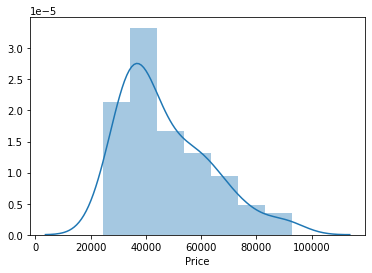

In [4]:
# Creating a visual for 'Price'

import seaborn as sns
import matplotlib.pyplot as plt

sns.distplot(df['Price']);